# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from statistics import mode
from scipy import stats as scs
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']  =  [10, 5]
plt.rcParams['figure.dpi']  =  75
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Capstone Task 2.1 (Visualization using Python)

Analysis of percentage of default and check whether it is imbalanced data?

Replace missing values with appropriate techniques

Use the right treatment for outliers in the data

Analyse default variable with demographic related data

Determine and draw insights on association between default and other variables , both categorical and numerical.


# Loading the DataSet

In [3]:
loan_df = pd.read_csv('Loan_details.csv')
status_df = pd.read_csv('Loan_status.csv')
Branch_df = pd.read_csv('Branch_region_mapping.csv')

In [4]:
loan_df.head(8)

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1
5,6,51803,67466,79.30,162,23-11-1964,Self employed,17-08-2018,1,1,0,0,0,0,300,0,15yrs 2mon,0
6,7,61947,109094,58.21,251,01-10-1989,Self employed,16-08-2018,1,0,0,1,0,0,737,0,1yrs 10mon,0
7,8,51301,61815,85.00,67,01-01-1995,Salaried,26-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0


In [5]:
status_df.head(8)

,Loan_id,loan_default
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0


In [6]:
Branch_df.head(8)

,branch_id,region
0,1,East
1,2,East
2,3,East
3,5,East
4,7,East
5,8,East
6,9,East
7,10,East


# Master DataFrame

In [7]:
master_df = loan_df.join(Branch_df.set_index('branch_id'), on = 'branch_id' )
master_df = master_df.join(status_df.set_index('Loan_id'), on = 'Loan_id')
master_df.head(8)

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
5,6,51803,67466,79.30,162,23-11-1964,Self employed,17-08-2018,1,1,0,0,0,0,300,0,15yrs 2mon,0,North,0
6,7,61947,109094,58.21,251,01-10-1989,Self employed,16-08-2018,1,0,0,1,0,0,737,0,1yrs 10mon,0,North,0
7,8,51301,61815,85.00,67,01-01-1995,Salaried,26-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0


# Finding Missing Values for data cleaning

In [8]:
master_df.isnull().sum()

Loan_id                                  0
disbursed_amount                         0
asset_cost                               0
ltv                                      0
branch_id                                0
Date.of.Birth                            0
Employment.Type                        770
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
region                                   0
loan_default                             0
dtype: int64

In [9]:
master_df.shape

(23315, 20)

# Finding if any Duplicate values

In [10]:
len(master_df['Loan_id'].unique())

23315

In [11]:
master_df['Employment.Type'].value_counts()

Self employed    12724
Salaried          9821
Name: Employment.Type, dtype: int64

# Replacing Null Values with String

In [12]:
master_df.replace(to_replace = np.nan, value = 'Unemployed', inplace = True)
master_df.isnull().sum()

Loan_id                                0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
region                                 0
loan_default                           0
dtype: int64

# We are assuming Missing values in Employment.Type as Unemployed instead of just dropping the Nan values, further analysis is conducted below to confirm this chosen label.

In [13]:
master_df['Employment.Type'].value_counts()

Self employed    12724
Salaried          9821
Unemployed         770
Name: Employment.Type, dtype: int64

# Detecting Outliers and treating the dataset for outliers

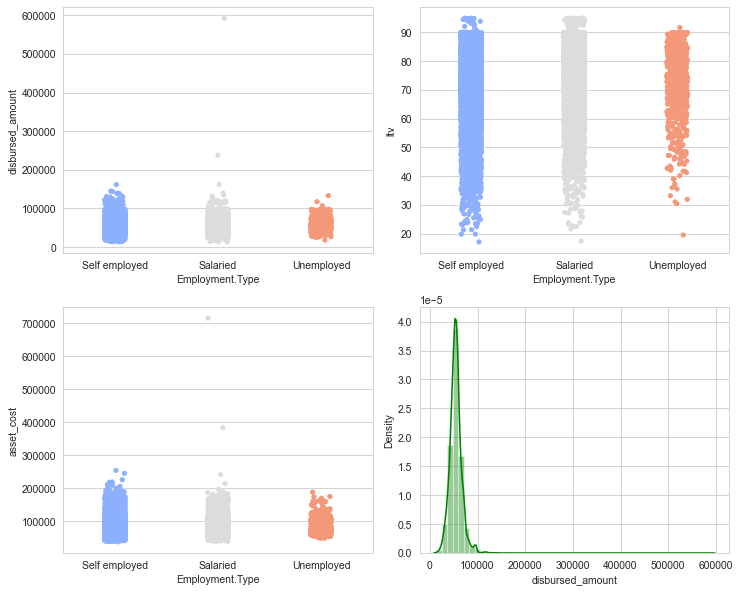

In [14]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
sns.stripplot(x=master_df['Employment.Type'], y=master_df['disbursed_amount'], palette= 'coolwarm', ax = axs[0][0])
sns.stripplot(x=master_df['Employment.Type'], y=master_df['ltv'], palette= 'coolwarm', ax = axs[0][1])
sns.stripplot(x=master_df['Employment.Type'], y=master_df['asset_cost'], palette= 'coolwarm', ax = axs[1][0])
sns.distplot(a =master_df['disbursed_amount'], color = 'g', kde = True, ax = axs[1][1])
plt.tight_layout()

In [15]:
upper_limit = master_df['disbursed_amount'].quantile(0.9999)
lower_limit = master_df['disbursed_amount'].quantile(0.01)
print(upper_limit,lower_limit)

162078.69439999806 26336.0


In [16]:
master_df = master_df[master_df['disbursed_amount']<upper_limit]
master_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,South,0
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,0,0,0,0,783,0,2yrs 6mon,0,South,0
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,East,1
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,0,0,0,0,0,0,0yrs 0mon,0,North,0
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,0,0,0,0,14,1,3yrs 1mon,1,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,0,0,0,0,650,0,5yrs 10mon,1,East,0
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,0,0,0,0,680,0,0yrs 9mon,0,East,0
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,0,0,0,0,825,0,2yrs 3mon,0,South,0
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,0,0,0,0,657,0,0yrs 6mon,2,East,0


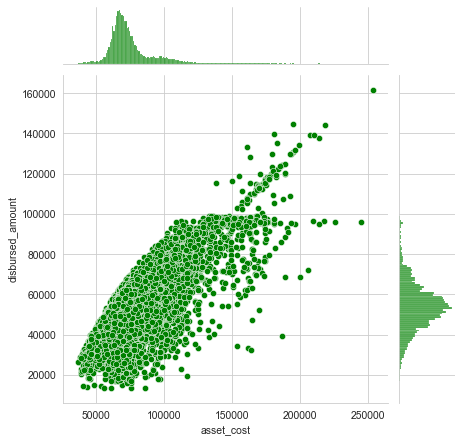

In [17]:
sns.jointplot(x = master_df['asset_cost'], y = master_df['disbursed_amount'] , kind='scatter',color='g')

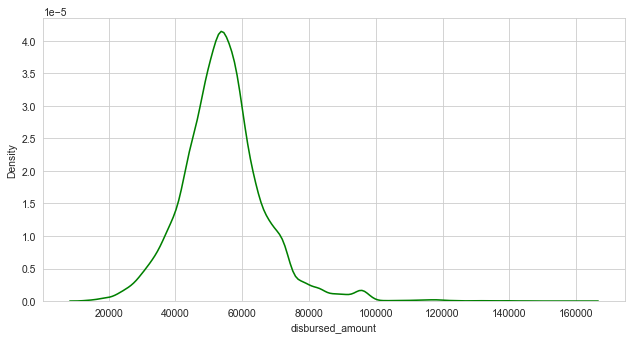

In [18]:
sns.kdeplot(master_df['disbursed_amount'],color = 'g');

((array([-4.01491945, -3.80060369, -3.68340909, ...,  3.68340909,
          3.80060369,  4.01491945]),
  array([ 13369,  13600,  13664, ..., 144085, 144698, 161608], dtype=int64)),
 (12249.720948322622, 54262.05799588196, 0.9797903051071684))

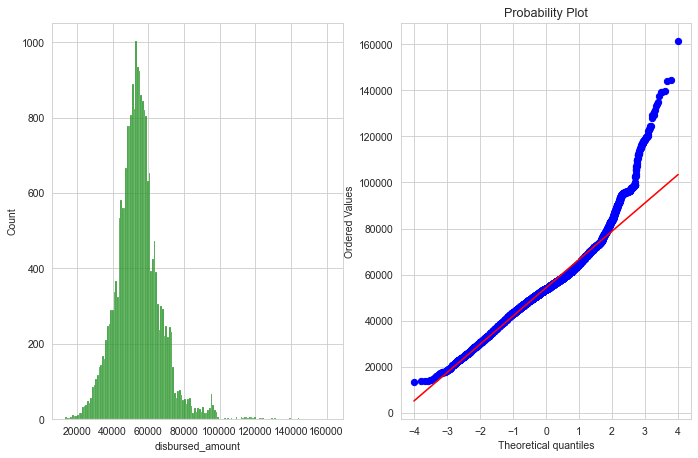

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(11,7))
sns.histplot(x = master_df['disbursed_amount'],color='g', ax = axs[0])
scs.probplot(master_df['disbursed_amount'], plot=plt )

# We are featurizing 'Age' to analyze demographic distribution of the dataset

In [20]:
DOB_series = pd.to_datetime(master_df['Date.of.Birth'])
Age_series = date.today().year - DOB_series.map(lambda dt: dt.year)
master_df['Age'] = Age_series
master_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
0,1,36439,65850,56.19,64,14-06-1990,Self employed,28-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,0,31
1,2,48749,69303,72.15,67,01-01-1991,Salaried,10-09-2018,1,1,...,0,0,0,783,0,2yrs 6mon,0,South,0,30
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
3,4,48849,64133,77.96,217,01-01-1989,Self employed,13-10-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,North,0,32
4,5,40394,59386,70.72,74,31-12-1974,Self employed,14-09-2018,1,1,...,0,0,0,14,1,3yrs 1mon,1,South,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,14-12-1982,Self employed,26-08-2018,1,1,...,0,0,0,650,0,5yrs 10mon,1,East,0,39
23311,23312,78879,122878,65.11,5,03-07-1993,Salaried,23-09-2018,1,1,...,0,0,0,680,0,0yrs 9mon,0,East,0,28
23312,23313,49349,67695,73.86,48,01-01-1994,Self employed,23-10-2018,1,1,...,0,0,0,825,0,2yrs 3mon,0,South,0,27
23313,23314,70897,84400,86.00,2,10-10-1982,Self employed,25-08-2018,1,1,...,0,0,0,657,0,0yrs 6mon,2,East,0,39


# Assessing the dataset based on Defaulted status

In [21]:
defaulted = master_df['loan_default'].value_counts()[1]/len(master_df['loan_default'])*100
print('{:2f} %'.format(defaulted))

21.988675 %


## The percentage value here suggests that the majority of the data belongs to the Not Defaulted category which may lead to majority oversampling if the whole dataset is considered for training the model.

In [22]:
defaulted_df = master_df[master_df['loan_default']==1]
defaulted_df

,Loan_id,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,...,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,region,loan_default,Age
2,3,55348,66340,85.00,2,16-08-1993,Self employed,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,28
9,10,34639,69717,50.49,34,23-11-1982,Self employed,26-10-2018,1,1,...,0,0,0,300,0,3yrs 10mon,0,East,1,39
19,20,78151,107074,74.25,135,05-06-1987,Self employed,25-10-2018,1,1,...,1,0,0,0,0,0yrs 0mon,0,West,1,34
26,27,45795,61513,76.41,73,15-09-1978,Salaried,20-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,South,1,43
27,28,53303,63376,86.78,3,16-09-1989,Salaried,07-09-2018,1,1,...,0,0,0,710,0,0yrs 6mon,0,East,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23279,23280,39664,62270,66.28,36,02-09-1968,Salaried,09-08-2018,1,0,...,1,0,0,694,0,5yrs 1mon,0,East,1,53
23281,23282,49850,87344,58.39,138,01-01-1988,Self employed,06-09-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23284,23285,43617,58075,79.90,105,01-01-1988,Salaried,31-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,West,1,33
23289,23290,53303,65728,83.68,16,01-01-1991,Salaried,08-08-2018,1,1,...,0,0,0,0,0,0yrs 0mon,0,East,1,30


#### Analyzing the dataset based on categorical data such as 'Region','Employment Type'. Also, Numeric Features 'CNS Score' and 'Delinquent Account count' considered.

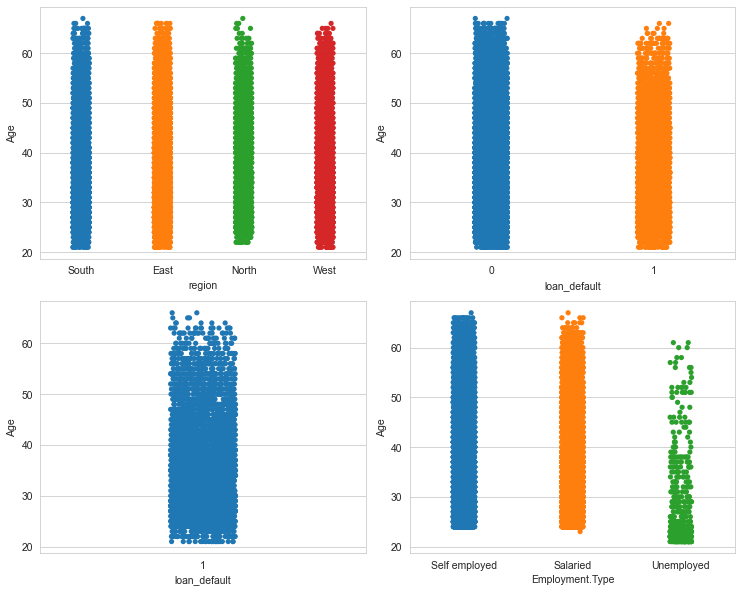

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
sns.stripplot(x = master_df['region'], y = master_df['Age'], ax= axs[0][0])
sns.stripplot(x = master_df['loan_default'], y = master_df['Age'], ax= axs[0][1])
sns.stripplot(x = defaulted_df['loan_default'], y = defaulted_df['Age'], ax= axs[1][0])
sns.stripplot(x = master_df['Employment.Type'], y = master_df['Age'], ax= axs[1][1])
plt.tight_layout()

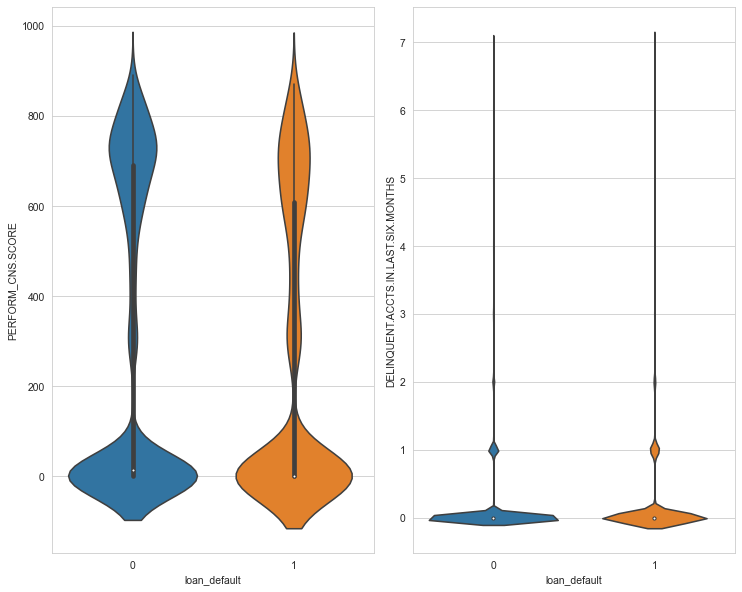

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10,8))
sns.violinplot(x = master_df['loan_default'], y = master_df['PERFORM_CNS.SCORE'], ax = axs[0])
sns.violinplot(x = master_df['loan_default'], y = master_df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'], ax = axs[1])
plt.tight_layout()

# Conclusion:
## After analyzing  Age distribution among different Employment types, it is observed that the Unemployment type (which is earlier replaced with this label as a part of missing value treatment) belongs to a lower age group which further confirms the label chosen, lower age group might yet to be Employed and forms the Educational loan portfolio of the bank.This section is more susceptible to default. Also, it is understood that individuals with lower Bureau score and high Delinquent accounts are more susceptible to default